<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab3/gnbai_lab3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GnB AI Project Assignment


## Lab 3: Multilayer Perceptron


### Tasks
1. data_lab3.txt의 데이터를 읽어서 $x, y$를 반환하는 함수를 작성하여라. data_lab3.txt는 $x_1, x_2, y$의 3개의 열로 이루어진 데이터이다. 
2. MLP를 통한 분류기 모델을 구현하여라. 단 MLP는 3개의 층을 가지며, 은닉층은 5개의 뉴런으로 이루어져있다. 
3. 은닉층과 출력층의 파라미터 값 $v, w$의 최적값은 무엇인가? 
4. 학습한 모델이 $(x_1,x_2)=(2,2)$와 $(x_1,x_2)=(4,4)$를 올바르게 분류하는지 검증하여라. 
5. iris.csv 데이터를 읽어서 $x_{train}, y_{train}, x_{test}, y_{test}$를 반환하는 함수를 작성하여라. 단, 함수 내에서 무작위로 순서를 섞은 뒤 7:3으로 train-test split을 하여라. 은닉층이 10개의 뉴런을 가지는 모델을 생성하고 100epoch마다 1번씩 train/test 데이터 각각의 error와 accuracy를 출력하여라.

### One-hot encoding 에 대해서
One-hot encoding은 label의 집합을 숫자로 표현하는 많은 기법 중에 하나입니다. 이미지 분류, 자연어 처리등 다양한 분야에서 기본적인 표현 방법인 만큼 반드시 이해하여야 합니다. One-hot encoding은 label집합의 크기를 벡터의 차원으로하고, 표현하고 싶은 인덱스에 1의 값을 부여하고, 나머지 인덱스에는 0을 부여하는 벡터 표현입니다. 이렇게 표현된 벡터를 원-핫 벡터라고 합니다.

One-hot encoding을 두 가지 과정으로 정리해보겠습니다.
1. 각 label에 고유한 인덱스를 부여합니다. (정수 인코딩)
2. 표현하고 싶은 label의 인덱스의 위치에 1을 부여하고, 다른 label의 인덱스의 위치에는 0을 부여합니다.

이해를 돕기 위해서 iris dataset의 예시를 들어서 설명해드리겠습니다.

In [0]:
import pandas as pd
name_file = "./iris.csv"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
pd.read_csv(name_file, names=columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


iris dataset은 붓꽃의 3가지 종(setosa, versicolor, virginica)에 대해 꽃받침(sepal)과 꽃잎(petal)의 길이를 정리한 데이터입니다. 위에서 확인할 수 있듯이, 원본의 데이터에서 붓꽃의 종에 해당하는 열(column)은 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'와 같이 문자열의 데이터입니다.
컴퓨터는 문자보다는 숫자를 더 잘 처리할 수 있습니다. 이를 위해서 One-hot encoding을 사용하여 종에 해당하는 문자열 데이터를 one-hot vector로 변환하여 학습에 사용할 것입니다.

1. 먼저 setosa, versicolor, virginica의 세가지 label을 각각 0, 1, 2로 고유한 인덱스를 부여합니다.
2. 각 label에 해당하는 인덱스만 1의 값이고, 나머지 인덱스는 0의 값을 가지는 벡터를 만듭니다.

iris dataset에서 150개의 데이터 중에서 5개를 뽑아서 살펴봅시다. 이때 species 열의 데이터가 다음과 같이 뽑혔다고 가정해봅시다.

$$
y=
\begin{bmatrix} 
    \text{Iris-versicolor} \\ 
    \text{Iris-setosa} \\ 
    \text{Iris-virginica}\\ 
    \text{Iris-versicolor} \\ 
    \text{Iris-setosa} 
\end{bmatrix}
$$

앞 단계에서 설명한 것과 같이 
```python
{'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica': 2}
```
와 같이 setosa, versicolor, virginica의 세가지 label을 각각 0, 1, 2로 고유한 인덱스를 부여합니다.

$$
y=
\begin{bmatrix} 
    \text{Iris-versicolor : 1} \\ 
    \text{Iris-setosa : 0} \\ 
    \text{Iris-virginica : 2}\\ 
    \text{Iris-versicolor : 1} \\ 
    \text{Iris-setosa : 0} 
\end{bmatrix}
$$

그 다음, 부여받은 인덱스가 $0$이라면 $\begin{bmatrix} 1 & 0 & 0 \end{bmatrix}$, $1$이라면 $\begin{bmatrix} 0 & 1 & 0 \end{bmatrix}$, $2$라면 $\begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$의 벡터로 각각 변환합니다.

$$
y=
\begin{bmatrix} 
    0 & 1 & 0 \\ 
    1 & 0 & 0 \\ 
    0 & 0 & 1 \\ 
    0 & 1 & 0 \\ 
    1 & 0 & 0 \\ 
\end{bmatrix}
$$

이렇게 One-hot encoding을 통해 문자열 label을 벡터로 변환함으로써 $(I, J)$ 모양의 y행렬을 얻을 수 있습니다.


### Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Prepare data

In [0]:
def load_data():
    ''' data_lab3.txt 파일을 읽고 데이터를 전처리하여 numpy 행렬로 반환합니다.
    입력 - 없음
    출력 - x : (I,N)의 shape을 가지는 numpy 행렬
         - y : (I,J)의 shape을 가지는 one-hot encoding된 numpy 행렬
    '''
    # read data file

    # shuffle order of data

    # define x

    # define y as one-hot vector

    # clear memory

    return x, y

### 2. Define model

In [0]:
class MLP_3layer:

    def __init__(self, layer_sizes=(2,5,2), hyper_params=(0.01,0.01,3000)):
        ''' MLP_3layer 클래스의 생성자입니다.
        입력 - layer_sizes  : (N, K, J)의 튜플. 입력층, 은닉층, 출력층의 크기를 결정
             - hyper_params : (alpha_v, alpha_w, max_epoch)의 튜플
        출력 - 없음
        '''
        # define N, K, J
        self.N, self.K, self.J = layer_sizes

        # define hyper parameters
        self.alpha_v, self.alpha_w, self.max_epoch = hyper_params

        # initialize parameters randomly
        self.v = np.random.rand(self.N+1, self.K)   # weight of hidden layer
        self.w = np.random.rand(self.K+1, self.J)   # weight of output layer


    def train(self, x, y, verbose=True):
        ''' train data로 모델을 학습시킵니다. 
        입력 - x : train data의 x numpy 행렬
             - y : train data의 y numpy 행렬
             - verbose : 학습 실행과정을 print할지 결정하는 boolean값
        출력 - history_err : 100번마다 계산한 error를 모아둔 list
             - history_acc : 100번마다 계산한 accuracy를 모아둔 list
        '''
        # 학습 데이터 행렬을 모델에 복사
        self.I = x.shape[0]
        self.x = x
        self.y = y
        
        # error, accuracy 값을 기록하기 위한 빈 리스트 생성
        history_err = []
        history_acc = []

        # 메인 학습 반복문
        for epoch in range(1, self.max_epoch+1):
            
            # 순전파 메소드 호출
            
            # 역전파 메소드 호출
            
            # 100번의 epoch마다 train data의 error와 accuracy를 계산하여 기록/출력
            if epoch % 100 == 0:
                # 함수로 error, accuracy 구하기

                # 구한 error, accuracy를 리스트에 추가

                # verbose가 True일 때
                if verbose:
                    # epoch, error, accuracy 출력
        
        return history_err, history_acc
    

    def train_with_eval(self, x, y, x_test, y_test, verbose=True):
        ''' train data로 모델을 학습시키면서 100번마다 test data으로 평가합니다.
        입력 - x : train data의 x numpy 행렬
             - y : train data의 y numpy 행렬
             - x_test : test data의 x numpy 행렬
             - y_test : test data의 y numpy 행렬
             - verbose : 학습 실행과정을 print할지 결정하는 boolean값
        출력 - history_err : 100번마다 계산한 error를 모아둔 list
             - history_acc : 100번마다 계산한 accuracy를 모아둔 list
             - history_err_test : 100번마다 test data로 계산한 error를 모아둔 list
             - history_acc_test : 100번마다 test data로 계산한 accuracy를 모아둔 list
        '''
        # 학습 데이터 행렬을 모델에 복사
        self.I = x.shape[0]
        self.x = x
        self.y = y

        # error, accuracy 값을 기록하기 위한 빈 리스트 생성
        history_err = []
        history_acc = []
        history_err_test = []
        history_acc_test = []
        
        # 메인 학습 반복문
        for epoch in range(1, self.max_epoch+1):
            
            # 순전파 메소드 호출
            
            # 역전파 메소드 호출
            
            # 100번의 epoch마다 train/test data의 error와 accuracy를 계산하여 기록/출력
            if epoch % 100 == 0:
                # 함수로 error, accuracy, test_error, test_accuracy구하기

                # 구한 error, accuracy, test_error, test_accuracy를 리스트에 추가
                
                # verbose가 True일 때
                if verbose:
                    # epoch, error, accuracy, test_error, test_accuracy 출력
                
                # evaluate 함수에서 데이터를 바꾸기 때문에 원래 데이터로 돌려놓는다.
                self.I = x.shape[0]
                self.x = x
                self.y = y
        
        return history_err, history_acc, history_err_test, history_acc_test


    def forward_prop(self):
        ''' 모델의 순전파(forward propagation)를 한번 실행합니다. 
        입력 - 없음
        출력 - 없음
        '''
        # 은닉층 단계

        # 출력층 단계


    def back_prop(self):
        ''' 모델의 역전파(back propagation)를 한번 실행합니다. 
        입력 - 없음
        출력 - 없음
        '''
        # 출력층 단계

        # 은닉층 단계


    def predict(self, x):
        ''' 임의의 데이터 행렬 x에 대한 예측값 행렬을 구합니다. 
        입력 - x : 임의의 데이터 x의 numpy 행렬
        출력 - labels : 각 데이터에 대해 예측한 label 인덱스의 numpy 행렬
        '''
        # 테스트 데이터 행렬을 모델에 복사
        self.I = x.shape[0]
        self.x = x

        # 순전파를 통해 G를 구한다.

        # G를 통해 labels를 구한다. (hint: np.argmax())

        return labels
    

    def evaluate(self, x, y):
        ''' 임의의 데이터 행렬 x, y에 대해 오차와 정확도를 구합니다.
        입력 - x : 임의의 데이터 x의 numpy 행렬
             - y : 임의의 데이터 y의 numpy 행렬
        출력 - error    : x, y에 대한 sum of squared error 값
             - accuracy : x, y에 대한 accuracy 값(%)
        '''
        # 테스트 데이터 행렬을 모델에 복사
        self.I = x.shape[0]
        self.x = x
        self.y = y

        # 순전파를 통해 G를 구한다.

        # SSE(), get_accuracy()로 error와 accuracy를 구한다.

        return error, accuracy


    def sigmoid(self, z):
        ''' 행렬 z을 입력으로 하는 sigmoid 함수입니다.
        입력 - z : 임의의 shape을 가지는 numpy 행렬
        출력 - result : 행렬 z에 element-wise로 sigmoid 함수를 취한 행렬
        '''
        # sigmoid 함수를 완성해주세요!

        return result

    def SSE(self):
        ''' 모델의 sum of squared error를 구합니다.
        입력 - 없음
        출력 - error : 모델의 행렬 G와 행렬 y를 통해 구한 SSE 값
        '''
        # SSE 함수를 완성해주세요!

        return error
    
    def get_accuracy(self):
        ''' 모델의 accuracy를 구합니다.
        입력 - 없음
        출력 - accuracy : 모델의 행렬 G와 행렬 y를 통해 구한 accuracy 값
        '''
        # get_accuracy 함수를 완성해주세요!

        return accuracy
        
    def get_parameters(self):
        return self.v, self.w

### 3. Train model

In [0]:
# load_data() 함수로 데이터 행렬 구하기
x, y = load_data()

# 모델 생성자에 입력할 매개변수 정의
layer_sizes  = (x.shape[1], 5, y.shape[1])
hyper_params = (0.01, 0.01, 3000)

# 모델 생성
model = MLP_3layer(layer_sizes, hyper_params)

# 모델 학습 시작 / 반환값 저장
history = model.train(x, y)

epoch : 100	error : 12.311083	accuracy : 58.823529
epoch : 200	error : 12.246221	accuracy : 58.823529
epoch : 300	error : 12.177715	accuracy : 58.823529
epoch : 400	error : 12.100820	accuracy : 58.823529
epoch : 500	error : 12.009708	accuracy : 58.823529
epoch : 600	error : 11.898003	accuracy : 58.823529
epoch : 700	error : 11.758147	accuracy : 58.823529
epoch : 800	error : 11.582255	accuracy : 58.823529
epoch : 900	error : 11.363656	accuracy : 58.823529
epoch : 1000	error : 11.097877	accuracy : 64.705882
epoch : 1100	error : 10.782694	accuracy : 70.588235
epoch : 1200	error : 10.418032	accuracy : 76.470588
epoch : 1300	error : 10.006577	accuracy : 82.352941
epoch : 1400	error : 9.554971	accuracy : 86.274510
epoch : 1500	error : 9.074542	accuracy : 88.235294
epoch : 1600	error : 8.580505	accuracy : 90.196078
epoch : 1700	error : 8.089500	accuracy : 92.156863
epoch : 1800	error : 7.616571	accuracy : 96.078431
epoch : 1900	error : 7.172958	accuracy : 96.078431
epoch : 2000	error : 6.7653

### 4. What are the optimal parameter values?

In [0]:
# get_parameter() 메소드로 모델의 파라미터 값 구하기


parameter values for hidden layer
[[ 0.49766588  1.08318823  1.40261441  0.93370853 -2.36919314]
 [ 1.08321747  1.31437997  1.35028741  1.39556907  0.45609098]
 [ 1.71465423  1.26879008  1.00716374  0.85912764  0.57324343]]

parameter values for output layer
[[ 1.22702344 -1.82513321]
 [ 1.42645165 -1.37246855]
 [ 1.39247164 -1.28150292]
 [ 1.19544075 -0.73083541]
 [ 0.01068802  0.01787479]
 [-8.07184277  7.977847  ]]


### 5. Show that your classifier can correctly classify for (2, 2), (4, 4)
(직접 plot_result() 함수를 정의해서 plot해보세요!)

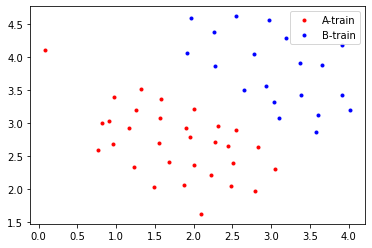

In [0]:
# predict() 메소드로 train 데이터에 대한 예측값을 구한다

# train 데이터에 대한 예측값을 plot한다.


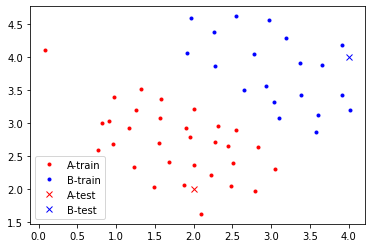

In [0]:
# test 데이터 정의
x_test = np.array([[2, 2], [4, 4]])

# predict() 메소드로 test 데이터에 대한 예측값을 구한다

# train 데이터와 test 데이터에 대한 예측값을 함께 plot한다.


## (+) Iris dataset classification

#### Prepare data

In [0]:
def load_iris_data(split_rate=0.7):
    ''' iris.csv 파일을 읽고 데이터를 전처리하여 numpy 행렬로 반환합니다.
    입력 - split_rate : train/test split의 비율
    출력 - x_train : (I_train,N)의 shape을 가지는 numpy 행렬
         - y_train : (I_train,J)의 shape을 가지는 one-hot encoding된 numpy 행렬
         - x_test  : (I_test,N)의 shape을 가지는 numpy 행렬
         - y_test  : (I_test,J)의 shape을 가지는 one-hot encoding된 numpy 행렬
    '''
    # read data file

    # shuffle order of data

    # define x

    # define y as one-hot vector

    # train-test split

    # clear memory

    return x_train, y_train, x_test, y_test

#### Train model

In [0]:
# load_data() 함수로 데이터 행렬 구하기
x_train, y_train, x_test, y_test = load_iris_data(0.7)

# 모델 생성자에 입력할 매개변수 정의
layer_sizes  = (x_train.shape[1], 10, y_train.shape[1])
hyper_params = (0.01, 0.01, 2000)

# 모델 생성
model = MLP_3layer(layer_sizes, hyper_params)

# 모델 학습 시작 / 반환값 저장
history = model.train_with_eval(x_train, y_train, x_test, y_test)

epoch : 100	train err : 56.519445	train acc : 35.238095	test err : 27.233557	test acc : 28.888889
epoch : 200	train err : 54.666076	train acc : 35.238095	test err : 26.762827	test acc : 28.888889
epoch : 300	train err : 24.971887	train acc : 73.333333	test err : 12.031529	test acc : 51.111111
epoch : 400	train err : 18.434483	train acc : 75.238095	test err : 9.175797	test acc : 53.333333
epoch : 500	train err : 14.210443	train acc : 93.333333	test err : 7.134070	test acc : 91.111111
epoch : 600	train err : 14.727855	train acc : 95.238095	test err : 6.518569	test acc : 91.111111
epoch : 700	train err : 11.665070	train acc : 96.190476	test err : 4.913603	test acc : 95.555556
epoch : 800	train err : 6.792570	train acc : 97.142857	test err : 2.886814	test acc : 95.555556
epoch : 900	train err : 4.800890	train acc : 97.142857	test err : 2.043482	test acc : 95.555556
epoch : 1000	train err : 3.885536	train acc : 97.142857	test err : 1.674317	test acc : 95.555556
epoch : 1100	train err : 3.37

#### Plot train history

In [0]:
# model.train_with_eval()의 반환값 history로부터 
# err_train, acc_train, err_test, acc_test로 unpacking하기 

# err_train, err_test는 SSE여서 직접적인 비교가 불가능하므로
# err_test의 각각의 요소에 7/3을 곱하여 크기를 맞추어준다


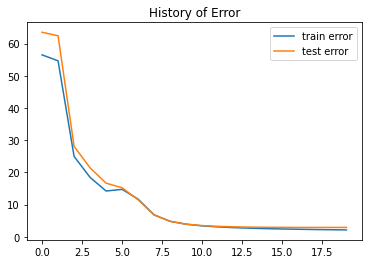

In [0]:
# err_train, err_test를 함께 plot하기


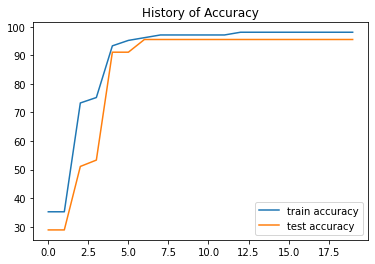

In [0]:
# acc_train, acc_test를 함께 plot하기
